<a href="https://colab.research.google.com/github/armiro/COVID-CXNet/blob/master/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
# load the metadata
metadata = pd.read_csv('F:/COVID-CXNet-master/COVID-CXNet-master/metadata.csv', index_col=None)
print('metadata header:', metadata.columns)

metadata header: Index(['filename', 'patient_id', 'sex', 'age', 'view', 'label', 'pcr_test',
       'survival', 'location', 'admission_offset', 'symptom_offset',
       'also_had_ct', 'has_fever', 'has_cough', 'has_dyspnea', 'has_diarrhea',
       'spo2', 'other_symptoms', 'medical_background', 'opacification',
       'other', 'is_bilateral', 'url'],
      dtype='object')


In [5]:
metadata = metadata.drop(columns=['filename', 'url'])
metadata.fillna(value='unknown', inplace=True)
print(metadata.head())

   patient_id     sex   age     view     label  pcr_test survival location  \
0          10  female  68.0  unknown  COVID-19  positive  unknown    Spain   
1          11    male  47.0  unknown  COVID-19  positive  unknown    Spain   
2          11    male  47.0  unknown  COVID-19  positive  unknown    Spain   
3          11    male  47.0  unknown  COVID-19  positive  unknown    Spain   
4          11    male  47.0  unknown  COVID-19  positive  unknown    Spain   

  admission_offset symptom_offset  ... has_fever has_cough has_dyspnea  \
0          unknown        unknown  ...       1.0       1.0     unknown   
1              1.0        unknown  ...       1.0   unknown     unknown   
2              4.0        unknown  ...       1.0   unknown     unknown   
3              8.0        unknown  ...       1.0   unknown     unknown   
4             12.0        unknown  ...       1.0   unknown     unknown   

  has_diarrhea     spo2 other_symptoms medical_background opacification  \
0      unkn

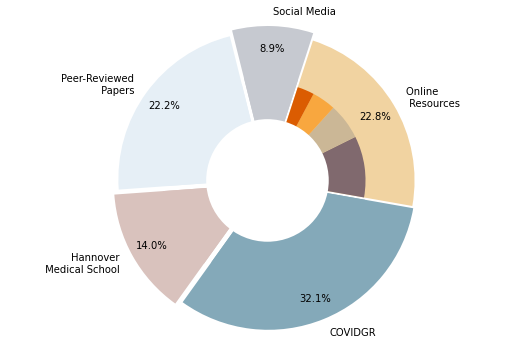

In [6]:
# distribution of data among different datasets (manual calculation)
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Online \n Resources', 'Social Media', 'Peer-Reviewed\n Papers', 
          'Hannover\n Medical School', 'COVIDGR']
sizes = [302, 118, 295, 185, 426] # total = 1326 images

sub_labels = ['Radiopaedia', 'SIRM', 'EuroRad', 'Other', '', '', '', '']
sub_sizes = [134, 79, 52, 37, 118, 295, 185, 426]

colors = ['#f1d3a1', '#C6C9D0', '#e6eff6', '#D9C2BD', '#84a9b9']
sub_colors = ['#80696E', '#cbb796', '#f8a73f', '#db5c01', 
              '#C6C9D0', '#e6eff6', '#D9C2BD', '#84a9b9']

explode = (0, 0.3, 0.1, 0.3, 0.1) 
sub_explode = (0, 0, 0, 0, 0.3,0.1,0.3,0.1)

# plot pie charts
fig = plt.figure(figsize=(7.5, 5))
p = plt.pie(sizes, labels=labels, colors=colors, startangle=-10, radius=6, explode=explode, 
        autopct='%.1f%%', pctdistance=0.85)
t = plt.pie(sub_sizes, colors=sub_colors, startangle=-10, radius=4, explode=sub_explode)

# draw inner circle
centre_circle = plt.Circle((0,0), 2.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()
# fig.savefig(fname='/content/distribution.svg')

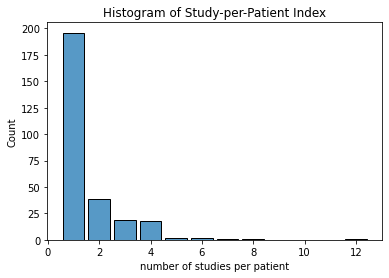

------------------------------
number of studies: 452
number of patients: 279
avg number of studies per patient: 1.62
std dev of studies per patient: 1.28


In [7]:
# patients and studies
num_studies = len(list(metadata['patient_id']))
unique_studies, study_counts = np.unique(list(metadata['patient_id']), return_counts=True)

fig = plt.figure()
sns.histplot(data=study_counts, bins=12, discrete=True, shrink=.85)
plt.xlabel('number of studies per patient')
plt.title('Histogram of Study-per-Patient Index')
plt.show()
# fig.savefig(fname='/content/studies_per_patient.pdf', bbox_inches='tight')
print('------------------------------')
print('number of studies:', num_studies)
print('number of patients:', len(unique_studies))
print('avg number of studies per patient: %.2f' % (num_studies/len(unique_studies)))
print('std dev of studies per patient: %.2f' % np.std(study_counts))

number of missing values: 196 / 452


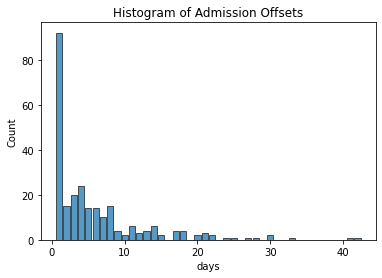

------------------------------
avg admission offset: 5.93
std dev of admission offsets: 7.03


In [8]:
# admission and symptom offsets
admission_offsets = list(metadata['admission_offset'])
print('number of missing values: %d / %d' % (admission_offsets.count('unknown'), len(admission_offsets)))

admission_offsets = [offset for offset in admission_offsets if offset != 'unknown']
admission_offsets.remove(80) # remove outlier

fig = plt.figure()
sns.histplot(data=admission_offsets, bins=None, discrete=True, shrink=.85)

plt.xlabel('days')
plt.title('Histogram of Admission Offsets')
plt.show()
# fig.savefig(fname='/content/admission_offset.pdf', bbox_inches='tight')
print('------------------------------')
print('avg admission offset: %.2f' % np.mean(admission_offsets))
print('std dev of admission offsets: %.2f' % np.std(admission_offsets))

number of missing values: 314 / 452


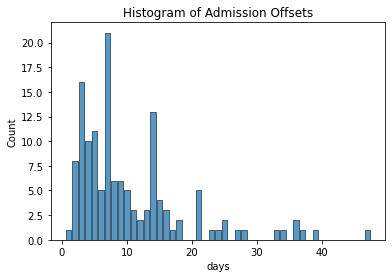

------------------------------
avg symptom offset: 10.49
std dev of symptom offsets: 8.66


In [9]:
# admission and symptom offsets
symptom_offsets = list(metadata['symptom_offset'])
print('number of missing values: %d / %d' % (symptom_offsets.count('unknown'), len(symptom_offsets)))

symptom_offsets = [offset for offset in symptom_offsets if offset != 'unknown']

fig = plt.figure()
sns.histplot(data=symptom_offsets, bins=None, discrete=True, shrink=.85)

plt.xlabel('days')
plt.title('Histogram of Admission Offsets')
plt.show()
# fig.savefig(fname='/content/symptom_offset.pdf', bbox_inches='tight')
print('------------------------------')
print('avg symptom offset: %.2f' % np.mean(symptom_offsets))
print('std dev of symptom offsets: %.2f' % np.std(symptom_offsets))

In [10]:
# distribution of different study features
prev_idx = 9
patient_sex_vals = list()
patient_age_vals = list()
pcr_test_results = list()
survival_results = list()
locations = list()
ct_captures = list()
fever = list()
cough = list()
dyspnea = list()

for idx, row in metadata.iterrows():
    if int(row[0]) == prev_idx:
        continue
    patient_sex_vals.append(row[1])
    patient_age_vals.append(row[2])
    pcr_test_results.append(row[5])
    survival_results.append(row[6])
    locations.append(row[7])
    ct_captures.append(row[10])
    fever.append(row[11])
    cough.append(row[12])
    dyspnea.append(row[13])
    
    prev_idx = int(row[0])

{'female': 73, 'male': 142, 'unknown': 64}


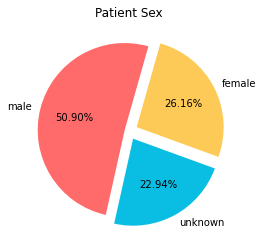

In [11]:
sex_dist = dict(Counter(patient_sex_vals))
print(sex_dist)

fig = plt.figure()
plt.pie(sex_dist.values(), explode=(0.1, 0.05, 0.1), labels=sex_dist.keys(),
        autopct='%1.2f%%', startangle=-20, colors=['#feca57', '#ff6b6b', '#0abde3'])
plt.title('Patient Sex')
plt.show()
# fig.savefig(fname='/content/sex_dist.png', bbox_inches='tight')

number of patients with unknown age is 62 / 279
-----------------------------------------------------


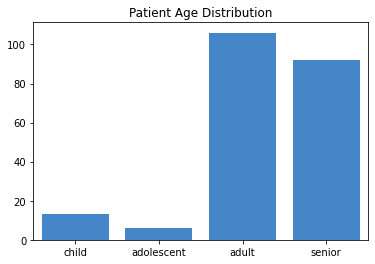

------------------------------
avg age: 53.76
std dev of ages: 21.20


In [12]:
# patient age (intervals: https://www.cdc.gov/nchs/products/databriefs/db334.htm)
patient_age_dist = [0, 0, 0, 0, 0]
for age in patient_age_vals:
    if age == 'unknown':
        patient_age_dist[-1] += 1
    else:
        if age <= 11:
            patient_age_dist[0] += 1
        elif 12 <= age <= 19:
            patient_age_dist[1] += 1
        elif 20 <= age <= 59:
            patient_age_dist[2] += 1
        elif 60 <= age:
            patient_age_dist[3] += 1

print('number of patients with unknown age is %d / %d' % (patient_age_dist[-1], sum(patient_age_dist)))
print('-----------------------------------------------------')
fig = plt.figure()
sns.barplot(x=['child', 'adolescent', 'adult', 'senior'], y=patient_age_dist[:-1], 
            color='#2e86de')
plt.title('Patient Age Distribution')
plt.show()
# fig.savefig(fname='/content/age_dist.png', bbox_inches='tight')
print('------------------------------')
patient_age_vals = [val for val in patient_age_vals if val != 'unknown']
print('avg age: %.2f' % np.mean(patient_age_vals))
print('std dev of ages: %.2f' % np.std(patient_age_vals))

Counter({'unknown': 227, 'AP': 190, 'PA': 35})


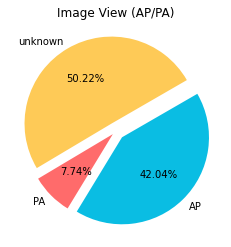

In [13]:
view_dist = Counter(metadata['view'])
print(view_dist)

fig = plt.figure()
plt.pie(view_dist.values(), explode=(0.1, 0.05, 0.1), labels=view_dist.keys(),
        autopct='%1.2f%%', startangle=30, colors=['#feca57', '#ff6b6b', '#0abde3'])
plt.title('Image View (AP/PA)')
plt.show()
# fig.savefig(fname='/content/view_dist.png', bbox_inches='tight')

Counter({'positive': 221, 'unknown': 46, 'negative': 12})


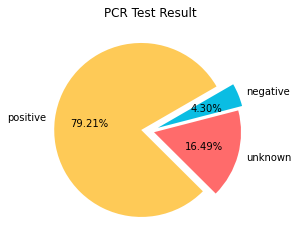

In [14]:
pcr_dist = Counter(pcr_test_results)
print(pcr_dist)

fig = plt.figure()
plt.pie(pcr_dist.values(), explode=(0.1, 0.05, 0.1), labels=pcr_dist.keys(),
        autopct='%1.2f%%', startangle=30, colors=['#feca57', '#ff6b6b', '#0abde3'])
plt.title('PCR Test Result')
plt.show()
# fig.savefig(fname='/content/pcr_dist.png', bbox_inches='tight')

Counter({'unknown': 210, 1.0: 57, 0.0: 12})


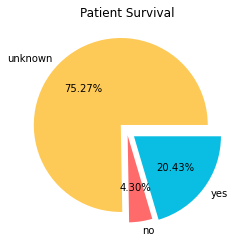

In [15]:
survival_dist = Counter(survival_results)
print(survival_dist)

fig = plt.figure()
plt.pie(survival_dist.values(), explode=(0.1, 0.05, 0.1), labels=['unknown', 'no', 'yes'],
        autopct='%1.2f%%', startangle=0, colors=['#feca57', '#ff6b6b', '#0abde3'])
plt.title('Patient Survival')
plt.show()
# fig.savefig(fname='/content/survival_dist.png', bbox_inches='tight')

Counter({'Italy': 76, 'Spain': 58, 'US': 47, 'UK': 22, 'Pakistan': 9, 'India': 7, 'Thailand': 5, 'Korea': 5, 'Jordan': 5, 'Turkey': 4, 'Russia': 4, 'Germany': 4, 'Indonesia': 4, 'Austria': 3, 'China': 2, 'Taiwan': 2, 'Guatemala': 2, 'Japan': 2, 'Saudi Arabia': 2, 'Qatar': 2, 'Peru': 2, 'unknown': 1, 'Greece': 1, 'Canada': 1, 'Egypt': 1, 'Portugal': 1, 'Finland': 1, 'Denmark': 1, 'Iran': 1, 'France': 1, 'Afghanistan': 1, 'UAE': 1, 'Poland': 1})


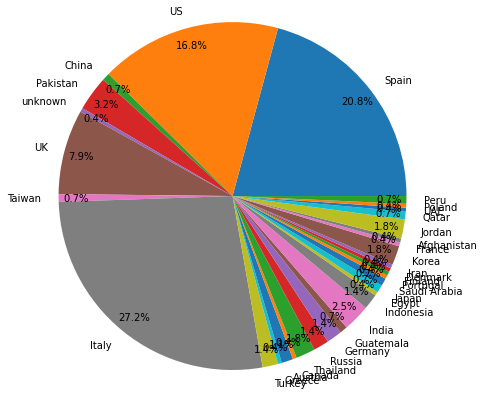

In [16]:
loc_dist = Counter(locations)
print(loc_dist)

fig = plt.figure()
plt.pie(loc_dist.values(), labels=loc_dist.keys(), radius=2.0,
        autopct='%.1f%%', startangle=0, pctdistance=0.9)
plt.show()
# fig.savefig(fname='/content/loc_dist.png', bbox_inches='tight')

Counter({0.0: 191, 1.0: 88})


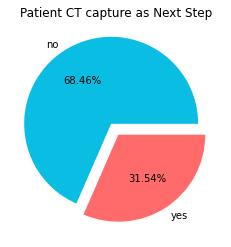

In [17]:
ct_captures = [val if val != 'unknown' else 0.0 for val in ct_captures]
ct_capture_dist = Counter(ct_captures)
print(ct_capture_dist)

fig = plt.figure()
plt.pie(ct_capture_dist.values(), explode=(0.1, 0.05), labels=['no', 'yes'],
        autopct='%1.2f%%', startangle=0, colors=['#0abde3', '#ff6b6b'])
plt.title('Patient CT capture as Next Step')
plt.show()
# fig.savefig(fname='/content/ct_pature_dist.png', bbox_inches='tight')

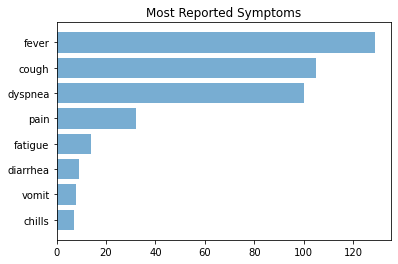

In [18]:
symptoms = {'fever': 129, 'cough': 105, 'dyspnea': 100, 'pain': 32, 'fatigue': 14,
            'diarrhea': 9, 'vomit': 8, 'chills': 7}

y_pos = list(reversed(np.arange(len(symptoms.keys()))))

plt.barh(y_pos, symptoms.values(), align='center', alpha=0.6)
plt.yticks(y_pos, symptoms.keys())
plt.title('Most Reported Symptoms')

plt.show()